## Hierarchical Clustering (Clustering Jerárquico)

In [104]:
# Antes de Ejecutar el instalar las siguientes librerías: pandas, numpy, matplotlib, sklearn, scipy

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Ejemplo 1

In [105]:
data = pd.read_csv('C:/users/santi/ia_repos/unsupervised-learning-python/data/Wholesale customers data.csv')

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [106]:
data.shape

(440, 8)

Antes de aplicar Hierarchical Clustering, tenemos que normalizar los datos para que la escala de cada variable sea la misma. ¿Porque es esto importante? Bueno, si la escala de las variables no es la misma, el modelo podría verse sesgado hacia las variables de mayor magnitud.

In [107]:
from sklearn.preprocessing import normalize

data_scaled = normalize(data)

In [108]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Dendograma

Un dendograma es un diagrama que representa un árbol. Esta representación esquemática se utiliza con frecuencia en diferentes contextos::

* En el agrupamiento jerárquico, ilustra la disposición de los agrupamientos producidos por los análisis correspondientes.
* En biología computacional, muestra la agrupación de genes o muestras, a veces en los márgenes de los mapas de calor.
* En filogenética, muestra las relaciones evolutivas entre varios taxones biológicos. En este caso, el dendograma es llamado también árbol filogenético.


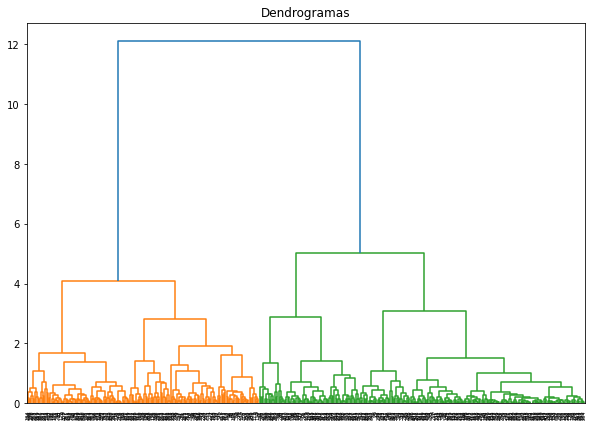

In [109]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  

plt.title("Dendrogramas")  

dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Eje Y :  Distancia Mínima

==> El criterio de varianza mínima de Ward minimiza la varianza total dentro del cluster

### Número de Clusters

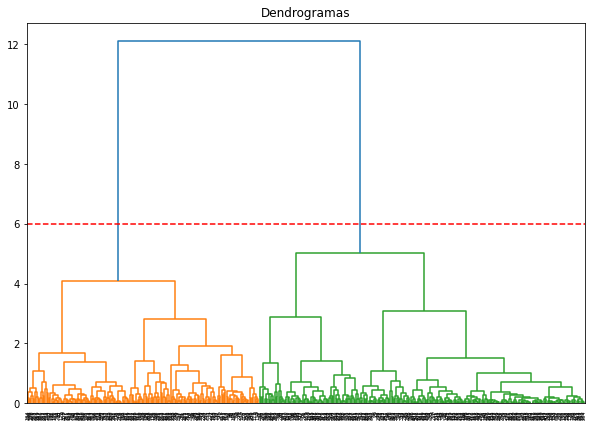

In [110]:
plt.figure(figsize=(10, 7))  

plt.title("Dendrogramas")

z = shc.linkage(data_scaled, method='ward')

dend = shc.dendrogram( z )

plt.axhline(y=6, color='r', linestyle='--')

plt.show()

In [111]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

In [112]:
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [113]:
cluster.labels_

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

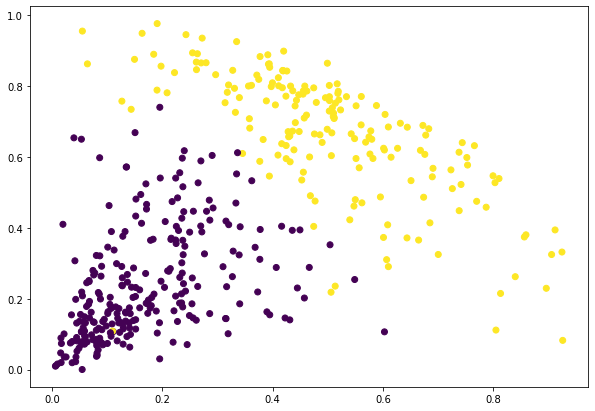

In [114]:
plt.figure(figsize=(10, 7))  

plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

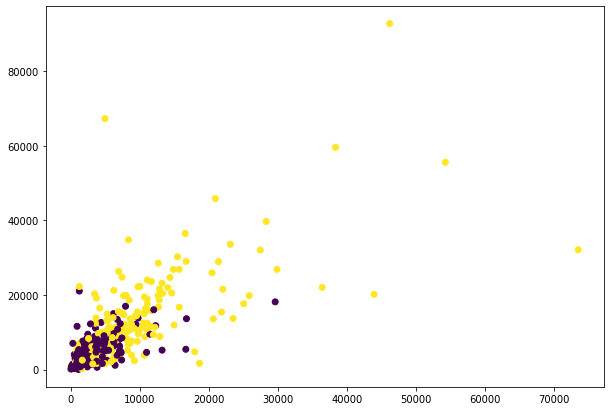

In [115]:
plt.figure(figsize=(10, 7))  

plt.scatter(data['Milk'], data['Grocery'], c=cluster.labels_)

## Ejemplo 2

In [138]:
customer_data = pd.read_csv('C:/users/santi/ia_repos/unsupervised-learning-python/data/Mall_Customers.csv')

In [139]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Dimensión de la Base de Datos

In [140]:
print(customer_data.shape)

(200, 5)


#### Eliminación de Columnas

In [141]:
data = customer_data.drop(columns= ["CustomerID","Gender"], axis=1)

In [142]:
data.shape

(200, 3)

In [143]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#### Normalización de la Data

In [144]:
data = pd.DataFrame( normalize(data) , columns=data.columns)

In [145]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.413925,0.326783,0.849635
1,0.247025,0.176446,0.952809
2,0.760286,0.608229,0.228086
3,0.280697,0.195267,0.939723
4,0.580683,0.318439,0.749269


### Dendograma

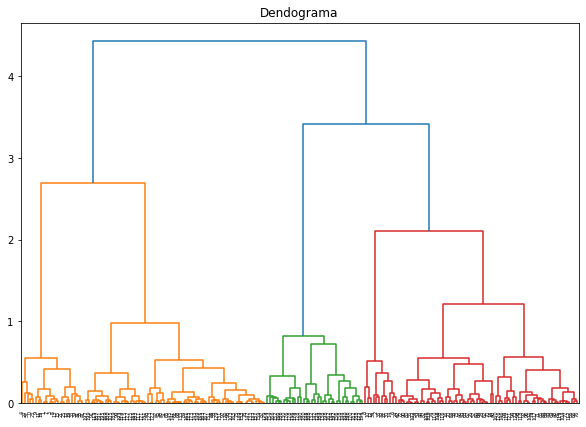

In [146]:
plt.figure(figsize=(10, 7))

plt.title("Dendograma")

dend = shc.dendrogram(shc.linkage(data, method='ward'))

###  ¿Dónde hacer el corte?

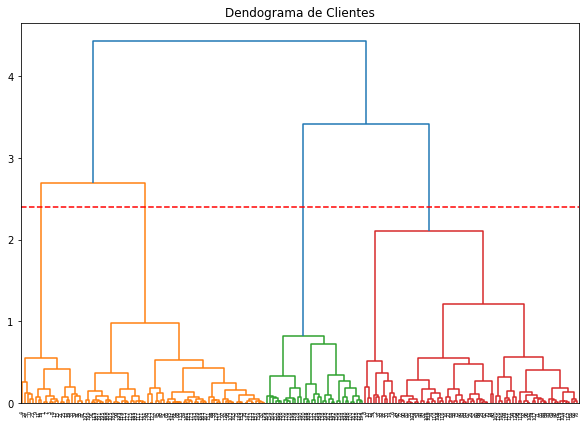

In [149]:
plt.figure(figsize=(10, 7))

plt.title("Dendograma de Clientes")

dend = shc.dendrogram(shc.linkage(data, method='ward'))

plt.axhline(y=2.4, color='r', linestyle='--')

plt.show()

###  Creando clusters con Clustering Jerárquico Aglomerativo

In [148]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit_predict(data)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

### Trazado de resultados

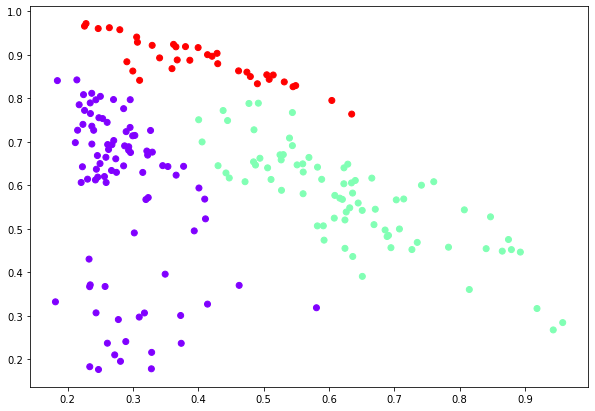

In [127]:
plt.figure(figsize=(10, 7))

plt.scatter(data["Age"], data["Annual Income (k$)"], c=cluster.labels_, cmap='rainbow')


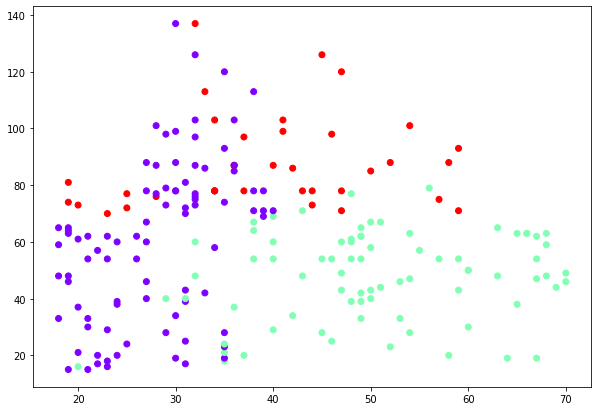

In [128]:
plt.figure(figsize=(10, 7))

plt.scatter(customer_data["Age"], customer_data["Annual Income (k$)"], c=cluster.labels_, cmap='rainbow')

In [129]:
cluster.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

## Ejemplo 3: Prueba Definitiva

In [130]:
data = np.load('C:/users/santi/ia_repos/unsupervised-learning-python/data/clusterable_data.npy') 
# from HDBSCAN creators
#  https://github.com/lmcinnes/hdbscan/blob/master/notebooks/clusterable_data.npy
data.shape

(2309, 2)

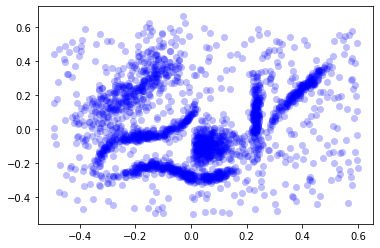

In [131]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

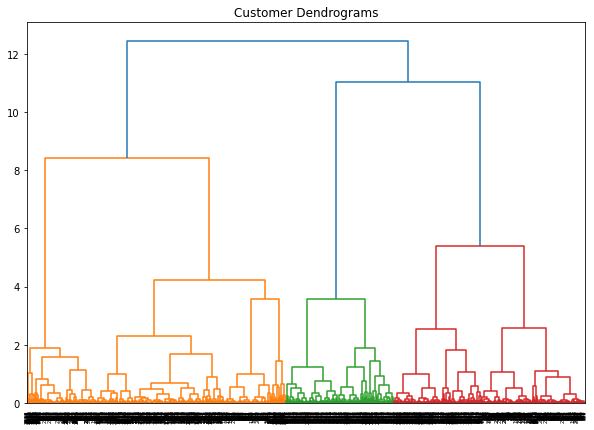

In [132]:
plt.figure(figsize=(10, 7))

plt.title("Customer Dendrograms")

dend = shc.dendrogram(shc.linkage(data, method='ward'))

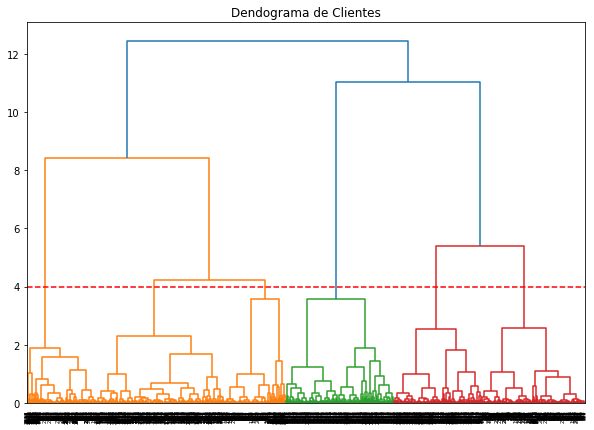

In [133]:
plt.figure(figsize=(10, 7))

plt.title("Dendograma de Clientes")

dend = shc.dendrogram(shc.linkage(data, method='ward'))

plt.axhline(y=4, color='r', linestyle='--')

plt.show()

In [134]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

cluster.fit_predict(data)

array([1, 1, 1, ..., 0, 3, 1], dtype=int64)

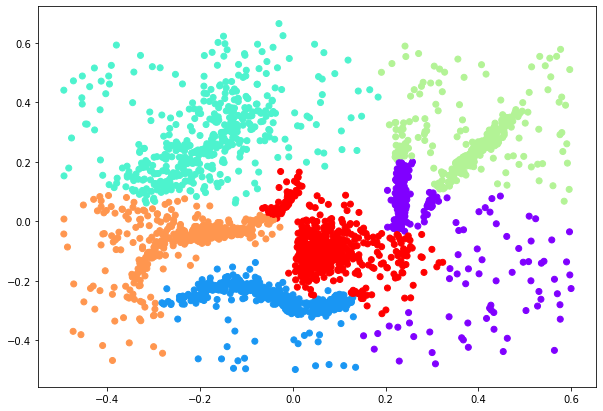

In [135]:
plt.figure(figsize=(10, 7))

plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')